## Standardization

Standardization is **a data preprocessing technique used in machine learning to scale and center features in a dataset**. 

The result of **standardization** (or **Z-score normalization**) is that the features will be rescaled so that they’ll have the properties of a standard normal distribution with

$$ \mu = 0 \text{ and } \sigma = 1 $$
where $\mu$ is the mean (average) and $\sigma$ is the standard deviation from the mean; standard scores (also called $z$ scores) of the samples are calculated as follows:
$$
z = \frac{x - \mu}{\sigma}
$$
<div style="display:flex;justify-content:center;">
<img src="images/standardizaion_graph.png" />
<img src="images/standardization_formula.png" width=300 />
</div>

Standardizing the features so that they are centered around 0 with a standard deviation of 1 is not only important if we are comparing measurements that have different units, but it is also a general requirement for many machine learning algorithms. Intuitively, we can think of gradient descent as a prominent example (an optimization algorithm often used in logistic regression, SVMs, perceptrons, neural networks etc.); with features being on different scales, certain weights may update faster than others since the feature values $x_j$ play a role in the weight updates

$$
\varDelta_j = - \eta \frac{\partial J}{\partial w_j} = \eta \sum_i(t^{(i)} - o^{(i)})x_j^{(i)},
$$
so that

$w_j \coloneqq w_j + \varDelta w_j$, where $\eta$ is the learning rate, $t$ the target class label, and $o$ the actual output. Other intuitive examples include K-Nearest Neighbor algorithms and clustering algorithms that use, for example, Euclidean distance measures – in fact, tree-based classifier are probably the only classifiers where feature scaling doesn’t make a difference.

In fact, the only family of algorithms that I could think of being scale-invariant are tree-based methods. Let’s take the general CART decision tree algorithm. Without going into much depth regarding information gain and impurity measures, we can think of the decision as “is feature $x_i >= \text{some val}$?” Intuitively, we can see that it really doesn’t matter on which scale this feature is (centimeters, Fahrenheit, a standardized scale – it really doesn’t matter).

Some examples of algorithms where feature scaling matters are:

- k-nearest neighbors with an Euclidean distance measure if want all features to contribute equally
- k-means (see k-nearest neighbors)
- logistic regression, SVMs, perceptrons, neural networks etc. if you are using gradient descent/ascent-based optimization, otherwise some weights will update much faster than others
- linear discriminant analysis, principal component analysis, kernel principal component analysis since you want to find directions of maximizing the variance (under the constraints that those directions/eigenvectors/principal components are orthogonal); you want to have features on the same scale since you’d emphasize variables on “larger measurement scales” more. There are many more cases than I can possibly list here … I always recommend you to think about the algorithm and what it’s doing, and then it typically becomes obvious whether we want to scale your features or not.

In addition, we’d also want to think about whether we want to “standardize” or “normalize” (here: scaling to $[0, 1]$ range) our data. Some algorithms assume that our data is centered at $0$. For example, if we initialize the weights of a small multi-layer perceptron with tanh activation units to $0$ or small random values centered around zero, we want to update the model weights “equally.” As a rule of thumb I’d say: When in doubt, just standardize the data, it shouldn’t hurt.

#### Standardization example 1: NumPy

In [6]:
import numpy as np

data = np.array([[10, 200], [20, 300], [30, 400], [40, 500]])
print("Original Data:\n", data)

# Calculate mean and standard deviation for each column
mean = np.mean(data, axis=0)
std_dev = np.std(data, axis=0)

# Standardize data
standardized_data = (data - mean) / std_dev

print("Standardized Data:")
print(standardized_data)


Original Data:
 [[ 10 200]
 [ 20 300]
 [ 30 400]
 [ 40 500]]
Standardized Data:
[[-1.34164079 -1.34164079]
 [-0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079]]


#### Standardization example 2: Scikit-Learn

In [7]:
from sklearn.preprocessing import StandardScaler

data = np.array([[10, 200], [20, 300], [30, 400], [40, 500]])
print("Original Data:\n", data)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the data
standardized_data_sklearn = scaler.fit_transform(data)

print("Standardized Data:")
print(standardized_data_sklearn)


Original Data:
 [[ 10 200]
 [ 20 300]
 [ 30 400]
 [ 40 500]]
Standardized Data:
[[-1.34164079 -1.34164079]
 [-0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079]]


## Min-Max scaling

An alternative approach to Z-score normalization (or standardization) is the so-called **Min-Max scaling** (often also simply called “normalization” - a common cause for ambiguities).
In this approach, the data is scaled to a fixed range - usually $0$ to $1$.
The cost of having this bounded range - in contrast to standardization - is that we will end up with smaller standard deviations, which can suppress the effect of outliers.

A Min-Max scaling is typically done via the following equation:

$$
X_{norm} = \frac{X - X_{min}}{X_{max} - X{min}}
$$

<div style="display:flex;justify-content:center;">
<img src="images/normalization_formula.png" />
</div>

#### Normalization example 1: NumPy

In [8]:
import numpy as np

data = np.array([[10, 200], [20, 300], [30, 400], [40, 500]])
print("Original Data:\n", data)

# Calculate min and max for each column
min_val = np.min(data, axis=0)
max_val = np.max(data, axis=0)

# Perform min-max scaling
scaled_data = (data - min_val) / (max_val - min_val)

print("Min-Max Scaled Data:")
print(scaled_data)


Original Data:
 [[ 10 200]
 [ 20 300]
 [ 30 400]
 [ 40 500]]
Min-Max Scaled Data:
[[0.         0.        ]
 [0.33333333 0.33333333]
 [0.66666667 0.66666667]
 [1.         1.        ]]


#### Normalization example 2: Scikit-Learn

In [9]:
from sklearn.preprocessing import MinMaxScaler

data = np.array([[10, 200], [20, 300], [30, 400], [40, 500]])
print("Original Data:\n", data)

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data_sklearn = scaler.fit_transform(data)

print("Min-Max Scaled Data")
print(scaled_data_sklearn)

Original Data:
 [[ 10 200]
 [ 20 300]
 [ 30 400]
 [ 40 500]]
Min-Max Scaled Data
[[0.         0.        ]
 [0.33333333 0.33333333]
 [0.66666667 0.66666667]
 [1.         1.        ]]


## Z-score standardization or Min-Max scaling?

“_Standardization or Min-Max scaling_?” - There is no obvious answer to this question: it really depends on the application.

For example, in clustering analyses, standardization may be especially crucial in order to compare similarities between features based on certain distance measures. Another prominent example is the Principal Component Analysis, where we usually prefer standardization over Min-Max scaling, since we are interested in the components that maximize the variance (depending on the question and if the PCA computes the components via the correlation matrix instead of the covariance matrix).

However, this doesn’t mean that Min-Max scaling is not useful at all! A popular application is image processing, where pixel intensities have to be normalized to fit within a certain range (i.e., 0 to 255 for the RGB color range). Also, typical neural network algorithm require data that on a 0-1 scale.

<div style="display:flex;justify-content:center;">
<img src="images/standardization_and_normalization.jpg" />
</div>

## Standardizing and normalizing - how it can be done using `scikit-learn`

Of course, we could make use of NumPy’s vectorization capabilities to calculate the z-scores for standardization and to normalize the data using the equations that were mentioned in the previous sections. However, there is an even more convenient approach using the preprocessing module from one of Python’s open-source machine learning library `scikit-learn`.

For the following examples and discussion, we will have a look at the free “Wine” Dataset that is deposited on the UCI machine learning repository
(http://archive.ics.uci.edu/ml/datasets/Wine).


The Wine dataset consists of 3 different classes where each row correspond to a particular wine sample.

The class labels (1, 2, 3) are listed in the first column, and the columns 2-14 correspond to 13 different attributes (features):

1) Alcohol
2) Malic acid \
$\dots$

In [10]:
import pandas as pd
import numpy as np

df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
     header=None,
     usecols=[0,1,2]
    )

df.columns=['Class label', 'Alcohol', 'Malic acid']
df.head()


,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


As we can see in the table above, the features **Alcohol** (percent/volumne) and **Malic acid** (g/l) are measured on different scales, so that **Feature Scaling** is necessary important prior to any comparison or combination of these data.

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

cols = ['Alcohol', 'Malic acid']

std_scale = StandardScaler().fit(df[cols])
df_std = std_scale.transform(df[cols])

minmax_scale = MinMaxScaler().fit(df[cols])
df_minmax = minmax_scale.transform(df[cols])

print('Mean after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean()))
print('\nStandard deviation after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std()))

print('-'*50)

print('Min-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min()))
print('\nMax-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max()))

Mean after standardization:
Alcohol=-0.00, Malic acid=-0.00

Standard deviation after standardization:
Alcohol=1.00, Malic acid=1.00
--------------------------------------------------
Min-value after min-max scaling:
Alcohol=0.00, Malic acid=0.00

Max-value after min-max scaling:
Alcohol=1.00, Malic acid=1.00


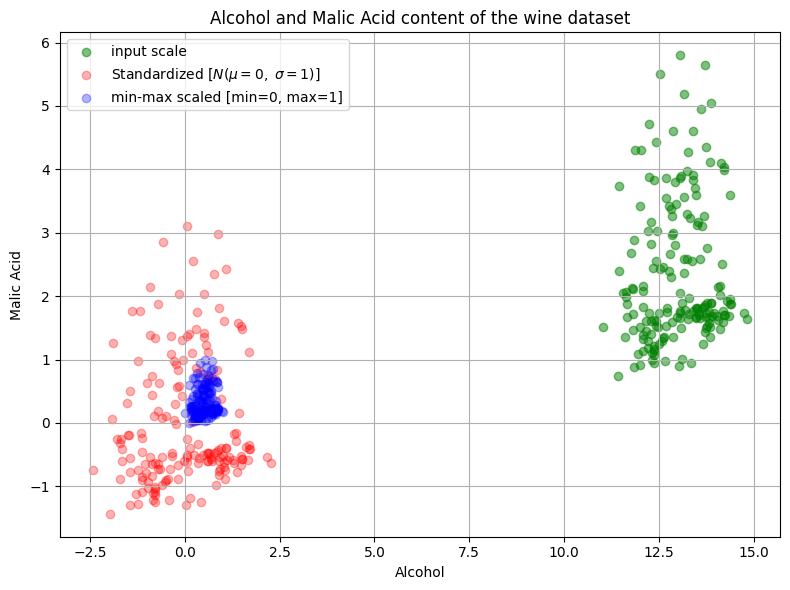

In [18]:
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['Alcohol'], df['Malic acid'],
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_std[:,0], df_std[:,1], color='red',
            label='Standardized [$N  (\mu=0, \; \sigma=1)$]', alpha=0.3)

    plt.scatter(df_minmax[:,0], df_minmax[:,1],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Alcohol and Malic Acid content of the wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

## Robust Scaling

**Robust Scaling** is a technique used to scale data that is robust to outliers. Unlike other scaling methods like **Min-Max Scaling** or **Standardization**, which can be influenced by extreme values, Robust Scaling relies on the median and the interquartile range (IQR). This makes it particularly useful for datasets with significant outliers.

---

### Formula for Robust Scaling:
$$
x' = \frac{x - \text{median}}{\text{IQR}}
$$

Where:
- **Median** is the middle value of the data.
- **IQR (Interquartile Range)** is the range between the 25th percentile (Q1) and the 75th percentile (Q3):  
  $$
  \text{IQR} = Q3 - Q1
  $$

This formula rescales the feature such that the median becomes 0 and the data is scaled based on the spread of the middle 50% of the data (from Q1 to Q3).

---

### Key Features of Robust Scaling:
1. **Outlier Resistance**: Robust scaling is less affected by extreme values because it uses the median and IQR instead of the mean and standard deviation.
2. **Data Range**: It centers the data around the median and scales it within the IQR range.

---

### Example Using scikit-learn:
Here’s how to use `RobustScaler` in scikit-learn:

In [ ]:
from sklearn.preprocessing import RobustScaler
import numpy as np

# Dummy dataset with an outlier
data = np.array([[10, 200], [20, 300], [30, 400], [1000, 500]])

# Create a RobustScaler instance
scaler = RobustScaler()

# Fit and transform the data
robust_scaled_data = scaler.fit_transform(data)

print("Robust Scaled Data:")
print(robust_scaled_data)

Here:
- The outlier value `1000` in the first column has less influence on the scaling compared to Min-Max Scaling or Standardization.

---

### When to Use Robust Scaling:
- When your dataset contains significant outliers.
- When preserving the impact of outliers isn't critical for your model.
- In models where scaling consistency across features is important. 

### Resources for this content

<a href="https://sebastianraschka.com/Articles/2014_about_feature_scaling.html">About Feature Scaling and Normalization</a>

<a href="https://proclusacademy.com/blog/robust-scaler-outliers/">Robust Scaling: Why and How to Use It to Handle Outliers</a>